In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
'''
adult_df = pandas.read_csv("./data/adult.csv", index_col=0)
compas_df = pandas.read_csv("./data/compas.csv", index_col=0)
bank_df = pandas.read_csv("./data/bank.csv", index_col=0)
german_df = pandas.read_csv("./data/german.csv", index_col=0)
'''
adult_df = pd.read_csv("./data/All_Data -adult.csv", index_col=0)
compas_df = pd.read_csv("./data/All_Data -compas.csv", index_col=0)
bank_df = pd.read_csv("./data/All_Data -bank.csv", index_col=0)
german_df = pd.read_csv("./data/All_Data -german.csv", index_col=0)


for df in [adult_df, compas_df, bank_df, german_df]:
    df["False Positive Rate Diff"] = df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"]
    df["False Negative Rate Diff"] = df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"]
    df["Accuracy Diff"] = df["Accuracy - Unprivileged"] - df["Accuracy - Privileged"]
    df["False Omission Rate Diff"] = df["False Omission Rate - Unprivileged"] - df["False Omission Rate - Privileged"]
    df["False Discovery Rate Diff"] = df["False Discovery Rate - Unprivileged"] - df["False Discovery Rate - Privileged"]
    df["Statistical Parity Diff"] = df["Unprivileged base Rate"] - df["Privileged base Rate"]
    df["F1 Score Diff"] = df["F1 Score - Unprivileged"] - df["F1 Score - Privileged"]
    for metric in df.columns:
        if "Num" in metric or "rivileged" in metric:
            df.drop(metric, axis=1, inplace=True)
    df.set_index = df[df.columns[0]]
    
    del df["Accuracy"]
    del df["F1 Score"]

In [3]:
adult_df

,Theil Index,Consistency,False Positive Rate Diff,False Negative Rate Diff,Accuracy Diff,False Omission Rate Diff,False Discovery Rate Diff,Statistical Parity Diff,F1 Score Diff
OP - 3,0.1840,0.9842,-0.0387,0.1468,0.1145,-0.1392,0.3015,-0.1167,-0.2041
OP - 11,0.1788,0.9687,-0.0351,0.1628,0.1101,-0.1363,0.3375,-0.1134,-0.2294
OP - 17,0.1707,0.9834,-0.0399,0.1679,0.0987,-0.1196,0.3013,-0.1185,-0.2213
OP + EOP - 3,0.2177,0.9211,-0.0006,-0.0077,0.1369,-0.1755,0.3059,-0.0420,-0.0719
OP + EOP - 11,0.2099,0.9175,0.0063,0.0145,0.1240,-0.1698,0.3526,-0.0386,-0.1143
...,...,...,...,...,...,...,...,...,...
GSR + CEOP - 11,0.1633,0.9377,0.1343,-0.4699,0.0453,-0.2010,0.4328,0.0986,0.0002
GSR + CEOP - 17,0.1623,0.9542,-0.0728,0.5255,0.0802,-0.0701,-0.2349,-0.2136,-0.6231
GSR + ROC - 3,0.0975,0.9223,0.0630,-0.1368,-0.0378,-0.0979,0.3297,-0.0420,-0.2456
GSR + ROC - 11,0.2325,0.9765,0.0229,-0.4365,0.2068,-0.2328,0.2328,0.0482,0.4321


In [4]:
def num_interventions(name):
    if "Logistic Regression" in name:
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3

In [5]:
no_int = []
one_int = []
two_int = []
three_int = []
for row in list(adult_df.index):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
vals_no_int = []
vals_one_int = []
vals_two_int = []
vals_three_int = []

no_int

['Logistic Regression - 3',
 'Logistic Regression - 11',
 'Logistic Regression - 17']

In [6]:
adult_df.head()

,Theil Index,Consistency,False Positive Rate Diff,False Negative Rate Diff,Accuracy Diff,False Omission Rate Diff,False Discovery Rate Diff,Statistical Parity Diff,F1 Score Diff
OP - 3,0.1840,0.9842,-0.0387,0.1468,0.1145,-0.1392,0.3015,-0.1167,-0.2041
OP - 11,0.1788,0.9687,-0.0351,0.1628,0.1101,-0.1363,0.3375,-0.1134,-0.2294
OP - 17,0.1707,0.9834,-0.0399,0.1679,0.0987,-0.1196,0.3013,-0.1185,-0.2213
OP + EOP - 3,0.2177,0.9211,-0.0006,-0.0077,0.1369,-0.1755,0.3059,-0.0420,-0.0719
OP + EOP - 11,0.2099,0.9175,0.0063,0.0145,0.1240,-0.1698,0.3526,-0.0386,-0.1143


In [7]:
adult_df.columns

Index(['Theil Index', 'Consistency', 'False Positive Rate Diff',
       'False Negative Rate Diff', 'Accuracy Diff', 'False Omission Rate Diff',
       'False Discovery Rate Diff', 'Statistical Parity Diff',
       'F1 Score Diff'],
      dtype='object')

In [52]:
'''
metric = "Consistency"
col = adult_df.reindex(columns=[metric], index=no_int)
vals = [float(col.sum()/len(col))]
col = adult_df.reindex(columns=[metric], index=one_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=two_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=three_int)
vals.append(float(col.sum()/len(col)))
heatmap_df = pandas.DataFrame(data=vals, columns=['Consistency'])
'''
heatmap_df = {}

for metric in adult_df.columns:
    if metric == "Adult":
        continue
    col = adult_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = adult_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Adult"] = vals
    
for metric in compas_df.columns:
    if metric == "Compas":
        continue
    col = compas_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = compas_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Compas"] = vals
    
for metric in bank_df.columns:
    if metric == "Bank":
        continue
    col = bank_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = bank_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Bank"] = vals

for metric in german_df.columns:
    if metric == "German":
        continue
    col = german_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = german_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - German"] = vals
    
heatmap_df = pd.DataFrame(heatmap_df)

heatmap_df

,Theil Index - Adult,Consistency - Adult,False Positive Rate Diff - Adult,False Negative Rate Diff - Adult,Accuracy Diff - Adult,False Omission Rate Diff - Adult,False Discovery Rate Diff - Adult,Statistical Parity Diff - Adult,F1 Score Diff - Adult,Theil Index - Compas,...,F1 Score Diff - Bank,Theil Index - German,Consistency - German,False Positive Rate Diff - German,False Negative Rate Diff - German,Accuracy Diff - German,False Omission Rate Diff - German,False Discovery Rate Diff - German,Statistical Parity Diff - German,F1 Score Diff - German
0,0.124733,0.944167,-0.083067,0.088133,0.118367,-0.104467,-0.020400,-0.183933,-0.048033,0.199367,...,0.034167,0.148067,0.816867,-0.108300,0.171333,-0.131533,-0.113500,0.213467,-0.235500,-0.197333
1,0.141204,0.945370,-0.016822,0.018263,0.075481,-0.120015,0.146907,-0.101059,-0.158141,0.258185,...,0.068585,0.153541,0.830241,-0.064948,0.114800,-0.140367,-0.123600,0.232385,-0.165385,-0.187111
2,0.156240,0.944308,-0.010967,0.069162,0.071696,-0.118799,0.170045,-0.092745,-0.202755,0.299533,...,0.061822,0.176772,0.855776,-0.034171,0.072242,-0.144777,-0.145258,0.241591,-0.107495,-0.178137
3,0.166940,0.941347,-0.013939,0.117447,0.073510,-0.118710,0.149032,-0.095536,-0.246229,0.247124,...,0.045512,0.208729,0.873399,0.019736,0.040183,-0.161701,-0.136542,0.260032,-0.047197,-0.182265


In [53]:
heatmap_df.columns

Index(['Theil Index - Adult', 'Consistency - Adult',
       'False Positive Rate Diff - Adult', 'False Negative Rate Diff - Adult',
       'Accuracy Diff - Adult', 'False Omission Rate Diff - Adult',
       'False Discovery Rate Diff - Adult', 'Statistical Parity Diff - Adult',
       'F1 Score Diff - Adult', 'Theil Index - Compas', 'Consistency - Compas',
       'False Positive Rate Diff - Compas',
       'False Negative Rate Diff - Compas', 'Accuracy Diff - Compas',
       'False Omission Rate Diff - Compas',
       'False Discovery Rate Diff - Compas',
       'Statistical Parity Diff - Compas', 'F1 Score Diff - Compas',
       'Theil Index - Bank', 'Consistency - Bank',
       'False Positive Rate Diff - Bank', 'False Negative Rate Diff - Bank',
       'Accuracy Diff - Bank', 'False Omission Rate Diff - Bank',
       'False Discovery Rate Diff - Bank', 'Statistical Parity Diff - Bank',
       'F1 Score Diff - Bank', 'Theil Index - German', 'Consistency - German',
       'False Posit

In [12]:
def isbetter(metric, val1, val2):
    ''' returns true if val2 better than val1'''
    if "Diff" in metric or "Theil" in metric:
        return abs(val2) < abs(val1)
    #if "Accuracy" in metric or "F1" in metric or "Base" in metric or "Consistency" in metric:
    if "Consistency" in metric:
        return val2 > val1
    return val2 < val1

In [13]:
heatmap = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        temp = []
        for col in heatmap_df.columns:
            temp.append(isbetter(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col]))
        percentage = sum(temp)/len(temp)
        heatmap[i,j] = percentage

heatmap

array([[0.        , 0.61111111, 0.61111111, 0.52777778],
       [0.38888889, 0.        , 0.55555556, 0.58333333],
       [0.38888889, 0.44444444, 0.        , 0.5       ],
       [0.47222222, 0.41666667, 0.5       , 0.        ]])

In [14]:
heatmap = np.flip(heatmap, axis=0)
heatmap

array([[0.47222222, 0.41666667, 0.5       , 0.        ],
       [0.38888889, 0.44444444, 0.        , 0.5       ],
       [0.38888889, 0.        , 0.55555556, 0.58333333],
       [0.        , 0.61111111, 0.61111111, 0.52777778]])

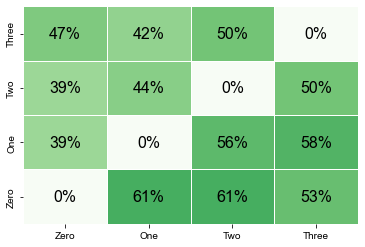

In [15]:
ints = ["Zero", "One", "Two", "Three"]
ax = sns.heatmap(heatmap*100, cmap='Greens', vmin=0, vmax=100, xticklabels=ints, yticklabels=ints[::-1], annot=True, cbar=False, linewidths=.5, annot_kws={"color": 'black', "size":16})
sns.set(font_scale=1.25) # font size 2
for t in ax.texts:
    t.set_text(t.get_text() + "%")
    
plt.savefig('./figures/fairness_heatmap.png', dpi=400, bbox_inches='tight', pad_inches=0)

In [16]:
'''
metric = "Accuracy"
col = adult_df.reindex(columns=[metric], index=no_int)
vals = [float(col.sum()/len(col))]
col = adult_df.reindex(columns=[metric], index=one_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=two_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=three_int)
vals.append(float(col.sum()/len(col)))
heatmap_df = pandas.DataFrame(data=vals, columns=['Accuracy - Adult'])
'''

'''
adult_df = pandas.read_csv("./data/adult.csv", index_col=0)
compas_df = pandas.read_csv("./data/compas.csv", index_col=0)
bank_df = pandas.read_csv("./data/bank.csv", index_col=0)
german_df = pandas.read_csv("./data/german.csv", index_col=0)
'''

adult_df = pd.read_csv("./data/All_Data -adult.csv", index_col=0)
compas_df = pd.read_csv("./data/All_Data -compas.csv", index_col=0)
bank_df = pd.read_csv("./data/All_Data -bank.csv", index_col=0)
german_df = pd.read_csv("./data/All_Data -german.csv", index_col=0)

util_metrics = ["Accuracy", "F1 Score"]
heatmap_df = {}

for metric in util_metrics:
    col = adult_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = adult_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Adult"] = vals
    
for metric in util_metrics:
    col = compas_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = compas_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Compas"] = vals
    
for metric in util_metrics:
    col = bank_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = bank_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Bank"] = vals

for metric in util_metrics:
    col = german_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = german_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - German"] = vals
    
heatmap_df = pd.DataFrame(heatmap_df)

heatmap_df

,Accuracy - Adult,F1 Score - Adult,Accuracy - Compas,F1 Score - Compas,Accuracy - Bank,F1 Score - Bank,Accuracy - German,F1 Score - German
0,0.845133,0.658033,0.671167,0.714367,0.900467,0.518767,0.753333,0.828767
1,0.798226,0.579281,0.613622,0.638548,0.793685,0.380337,0.729874,0.813885
2,0.781532,0.528808,0.599532,0.589319,0.622756,0.270103,0.699021,0.784104
3,0.773786,0.495614,0.615140,0.634596,0.399231,0.168497,0.664449,0.750975


In [17]:
def isworse(metric, val1, val2):
    ''' returns true if val2 worse than val1'''
    #if "Diff" in metric:
    #    return val2 > val1
    #if "Accuracy" in metric or "F1" in metric or "Base" in metric or "Consistency" in metric:
    #    return val2 < val1
    return val2 < val1

In [18]:
heatmap = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        temp = []
        for col in heatmap_df.columns:
            temp.append(isworse(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col]))
            #print(isworse(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col]), ints[i], ints[j])
            if i==1 and j==0:
                print(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col], isworse(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col]))
        percentage = sum(temp)/len(temp)
        heatmap[i,j] = percentage
        #print(percentage)

heatmap = np.flip(heatmap, axis=0)
heatmap

Accuracy - Adult 0.7982259259259259 0.8451333333333334 False
F1 Score - Adult 0.5792814814814815 0.6580333333333334 False
Accuracy - Compas 0.6136222222222222 0.6711666666666667 False
F1 Score - Compas 0.6385481481481482 0.7143666666666667 False
Accuracy - Bank 0.7936851851851853 0.9004666666666666 False
F1 Score - Bank 0.380337037037037 0.5187666666666667 False
Accuracy - German 0.7298740740740741 0.7533333333333333 False
F1 Score - German 0.8138851851851852 0.8287666666666667 False


array([[0.   , 0.125, 0.25 , 0.   ],
       [0.   , 0.   , 0.   , 0.75 ],
       [0.   , 0.   , 1.   , 0.875],
       [0.   , 1.   , 1.   , 1.   ]])

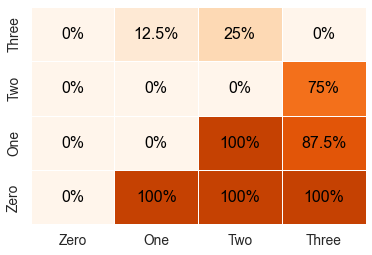

In [44]:
ints = ["Zero", "One", "Two", "Three"]

ax = sns.heatmap(heatmap*100, cmap='Oranges', vmin=0, vmax=125, xticklabels=ints, yticklabels=ints[::-1], annot=True, cbar=False, fmt='g', linewidths=.5, annot_kws={"color": 'black', "size":16})
#ax = sns.heatmap(heatmap*100, cmap='Greens', vmin=0, vmax=100, xticklabels=ints, yticklabels=ints[::-1], annot=True, cbar=False, linewidths=.5, annot_kws={"color": 'black', "size":16})
sns.set(font_scale=1.25) # font size 2
for t in ax.texts:
    t.set_text(t.get_text() + "%")
    
plt.savefig('./figures/utility_heatmap.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [29]:
cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']